<a href="https://colab.research.google.com/github/Gabrielhj17/Data-Science-Labs/blob/main/Copy_of_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Probability theory and probability density estimation

In this lab you will: (i) learn how to generate data from a normal (Gaussian) distribution, and from a multivariate normal distribution; (ii) play around with histograms to get a feel for how they relate to the underlying probability density function in different scenarios; (iii) use the Scikit Learn library to implement and play around with kernel density estimation.

Start by importing the libraries we'll use:

-  *numpy*, which is the standard numerical Python package.

- *scipy.stats*, which is useful for doing statistics


-  *matplotlib.pyplot*, which is a general purpose data visualisation library

    https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.html
    

- *KernelDensity* from *sklearn.neighbours*. This is part of *scikit-learn*, which is a standard go-to library for obtaining machine learning resources: algorithms, classifiers, metrics, datasets etc.

    https://scikit-learn.org/stable/

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

## 1. Random number generation and histograms

Here is how to generate data that are normally distributed, and plot with a basic histogram. Have a play around with the parameters.

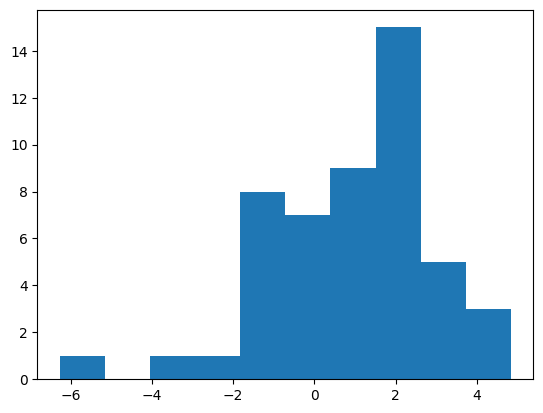

In [ ]:
# Generate 1D data from normal distribution
nbpts = 50 # Number of points to generate
mu = 1 # the mean
sigma = 2 # the standard deviation

data = np.random.normal(mu,sigma,(nbpts,1)) # makes a column vector

# Create histogram. By default, this will show how many points fall in each bin.
bins = 10 # This specifies the number of bins, Python decides the interval. This can be OK but means you do not specify exactly where the bins are.
plt.hist(data, bins)
plt.show()

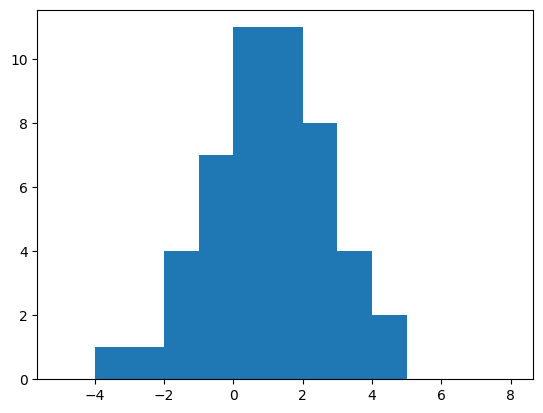

In [ ]:
# A different specification
edges = np.linspace(-5,8,14) # This specifies the number of bins and also where the first bin starts from
plt.hist(data, edges)
plt.show()

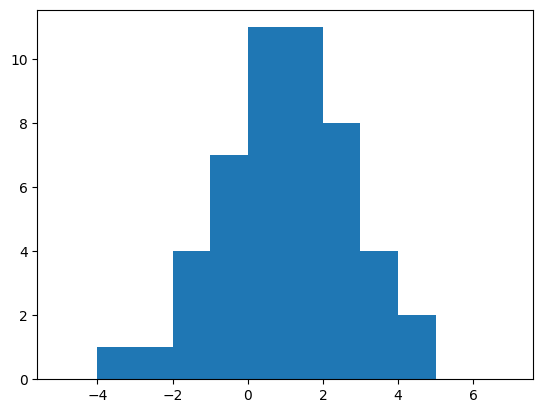

In [ ]:
# Another specification
binsize = 1
edges = np.arange(-5,8,binsize) # This specifies a sequence defining the left edge of each bin (and, indirectly, the number of bins)
plt.hist(data,edges)
plt.show()

Next let's do a normalised histogram.

We are using histograms to estimate probability densities. We need to remember that a probability density function has an area under the curve of 1 (when integrating over all values) so in order to be able to compare histogram and probability density function, we need to normalise our histograms.


(array([0.        , 0.02040816, 0.02040816, 0.08163265, 0.14285714,
        0.2244898 , 0.2244898 , 0.16326531, 0.08163265, 0.04081633,
        0.        , 0.        ]),
 array([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <BarContainer object of 12 artists>)

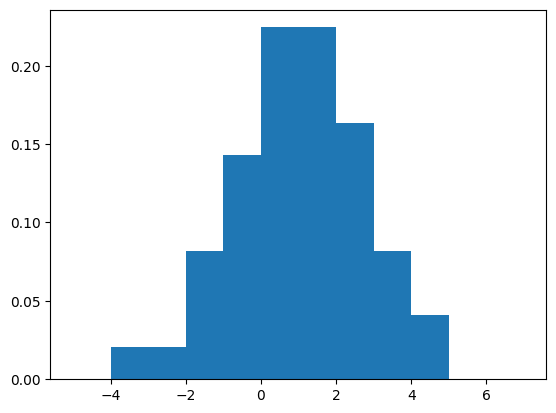

In [ ]:
binsize = 1
edges = np.arange(-5,8,binsize) # varying the step size in the sequence means changing the number of bins.
plt.hist(data, edges, density=True) #normalise the y values to get a probability density function (pdf)

Now we can superimpose the pdf (probability density function) of the normal distribution we used to generate the data. We will plot it in the same range as that covered by our edges.

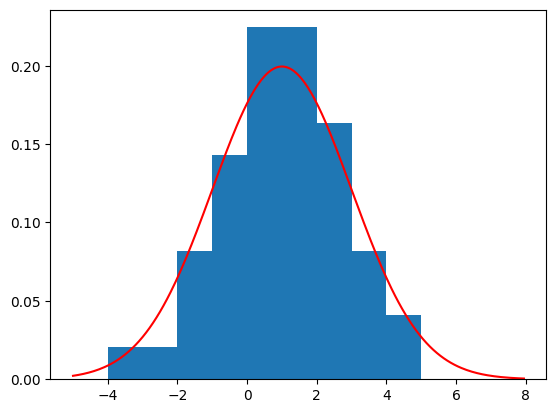

In [ ]:
binsize = 1
edges = np.arange(-5,8,binsize) # varying the step size in the sequence means changing the number of bins. Consider what happens when changing the value of binsize
plt.hist(data, edges, density=True)
x = np.arange(-5,8,0.05) # the x values over which I want the PDF
y = stats.norm.pdf(x,mu,sigma)
plt.plot(x,y,'r-') # plot with red line
plt.show()

It is important to understand that if you draw data from a distribution, the smaller the number of samples, the less likely you are to be able to accurately estimate the distribution.  A simple example is as follows.  Say I have a biased coin (e.g., a coin that returns heads a bit more often than tails).  I know it’s biased but you don’t.  If I only let you throw it 5 times, how likely are you to be able to infer that it is biased?  What if I let you throw it 100 times?  A million times?  The more you can sample, the more your estimated probability density converges to the true probability density.

Play around with the parameters above to get a feel for how the histogram compares with the true probability density function for different sample sizes and different numbers of bins.

### Optional homework

Try generating and plotting some data from another 1-d probability distribution, such as a uniform distribution and/or a log-normal distribution.

## 2. Multivariate normal (Gaussian) distribution

Now let's see how to generate data from a multivariate normal (Gaussian) distribution:

In [ ]:
nbpts=272
mu=[3.487783088,70.89705882] # mean of x and mean of y
sigma=[1.13927121,13.56996002] # standard deviation of x and standard deviation of y
corr=0.900811168 # correlation between x and y. This lies between -1 and 1.
cov=corr*sigma[0]*sigma[1]  #covariance, which is correlation times the 2 std devs.

C=[[sigma[0]**2,cov],[cov,sigma[1]**2]] #  covariance matrix

data=np.random.multivariate_normal(mu,C,nbpts)

Produce a scatter plot:

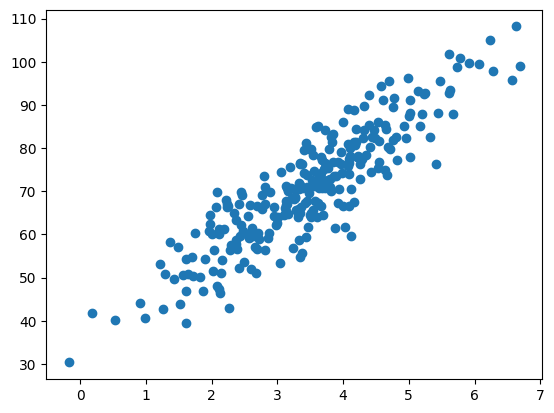

In [ ]:
plt.scatter(data[:,0],data[:,1])

Play around with the parameters of the multivariate normal distribution and the number of data points to get a sense of how this distribution behaves in theory and in sample.

### A note on matrices and vectors in Python

Above I have programmed in matrices as lists of rows, and vectors simply as lists. For full functionality, they should be declared as numpy arrays. So for example

$A=\left( \begin{array}{cc} 2 & 1 \\ 4 & 3 \end{array} \right)$

$B=\left( \begin{array}{cc} 5 & 2 \\ 2 & 2 \end{array} \right)$

$v=\left( \begin{array}{c} 2 \\ 1 \end{array} \right)$

can be written as:

In [ ]:
A=np.array([[2,1],[4,3]])
B=np.array([[5,2],[2,2]])
v=np.array([2,1])

Just so you know for future reference, matrix-vector multiplication and matrix-matrix multiplication are then done as follows

In [ ]:
np.dot(A,v)

array([ 5, 11])

In [ ]:
# alternatively

np.matmul(A,v)

array([ 5, 11])

In [ ]:
np.dot(A,B)

array([[12,  6],
       [26, 14]])

and the transpose can be obtained like this

In [ ]:
A.T

array([[2, 4],
       [1, 3]])

### Optional homework

Play around with different ways of visualising 2-d Gaussian data such as that just plotted above.

## 3. Kernel Density Estimation

Again, let's generate some random data from a normal (Gaussian) distribution:

In [ ]:
nbpts = 50 # Number of points to generate
mu = 1 # the mean
sigma = 2 # the standard deviation

data = np.random.normal(mu,sigma,(nbpts,1)) # makes a column vector

Now we will use kernel density estimation to estimate the probability distribution, using a standard Gaussian function as the kernel.

We will use the function KernelDensity from sklearn.neighbors (which has already been imported above). Here are the notes on this function:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html

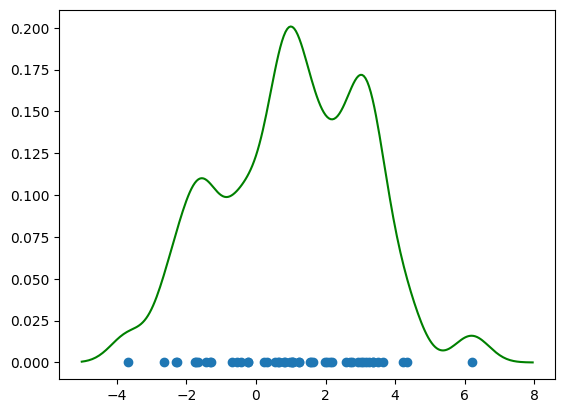

In [ ]:
h = 0.5 # Bandwidth of kernel
kde = KernelDensity(bandwidth=h, kernel='gaussian') # Set kernel to Gaussian
kde.fit(data) # Estimate the model based on the data

pts = np.arange(-5,8,0.05) # The x values over which I want the PDF and the density estimation
pts2=pts.reshape(-1,1)  # Convert the x values into a 2-d array. The 1 here specifies there will be 1 column-
                        # this is because there is just 1 variable, x.
                        # The -1 here specifies that the number of columns will just be that which is
                        #implied by the quantity of data.

log_dens = kde.score_samples(pts2) # Calculate the density estimates for desired data points (these return log densities)
plt.plot(pts2,np.exp(log_dens),'g-') # plot estimated densities in green

# Overlay the actual data along the x-axis to see how the kernel density estimation is working
y=np.zeros(nbpts)
plt.scatter(data,y)
plt.show()

Play around with the width of the kernel and the number of data points (and, if you like, the mean and standard deviation of the distribution).

### Optional homework

Write your own kernel density estimation function without using a library routine like sklearn.neighbors.

###  Further reading on kernel density estimation

An excellent resource on kernel density estimation is this tutorial:

https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

See also here:

https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

## 4. (Optional) Playing with Old Faithful data

In the file **faithful.csv** is data on eruption lengths and time to next eruption (in minutes) from the Old Faithful geyser that we met in the lectures. This file can be found on Canvas, next to where you found this notebook. Place a copy of it in the same directory from which you are running this notebook. You can then open the data like this:

In [ ]:
import pandas as pd

faithful_data=pd.read_csv('faithful.csv')
print(faithful_data)

FileNotFoundError: [Errno 2] No such file or directory: 'faithful.csv'

Then you can convert this dataframe into a 2-d array, with eruption lengths in column 0 and waiting times in column 1 like this:

In [ ]:
data=faithful_data.values

Have a go at plotting histograms and scatter plots for these data, and use kernel density estimation to plot an estimate of the probability distribution of waiting times.

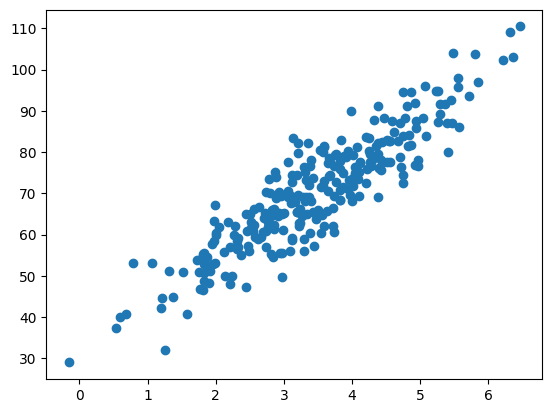

In [ ]:
#scatter plot
nbpts=272
mu=[3.487783088,70.89705882] # mean of x and mean of y
sigma=[1.13927121,13.56996002] # standard deviation of x and standard deviation of y
corr=0.900811168 # correlation between x and y. This lies between -1 and 1.
cov=corr*sigma[0]*sigma[1]  #covariance, which is correlation times the 2 std devs.

C=[[sigma[0]**2,cov],[cov,sigma[1]**2]] #  covariance matrix

data=np.random.multivariate_normal(mu,C,nbpts)

plt.scatter(data[:,0],data[:,1])
